## 1. Import and warehouse data:

#### Import the required libraries.

In [1]:
import mysql.connector as my_con

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.preprocessing import LabelEncoder
from pprint import pprint
import warnings
warnings.filterwarnings('ignore')

#### Connect to DB using mysql-connector-python package.

In [3]:
# Connection setup
MYSQL_Connection = my_con.connect(user ='root',
            password= 'caching_sha2_password', ##Give your password
            host= 'localhost',
            database= 'Telecom')

print(MYSQL_Connection)

#### Import all the given datasets from MYSQL server and Explore shape and size.

In [4]:
# Import first dataset from MY SQL server
import pandas as pd
df = pd.read_sql('SELECT * FROM TelecomCustomerChurn1', con=MYSQL_Connection)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No


In [5]:
#Shape of first dataset TelecomCustomerChurn1
shape = df.shape
shape

(7043, 10)

In [6]:
#Size of first dataset TelecomCustomerChurn1
size = df.size
size

70430

In [7]:
# Import second dataset from MY SQL server
df1 = pd.read_sql('SELECT * FROM TelecomCustomerChurn2', con=MYSQL_Connection)
df1.head()

,customerID,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
#Shape of second dataset TelecomCustomerChurn2
shape = df1.shape
shape

(7043, 12)

In [9]:
#Size of second dataset TelecomCustomerChurn2
size = df1.size
size

84516

#### Merge all datasets onto one and explore final shape and size.

In [10]:
df_merged = pd.merge(df, df1, how='inner')
df_merged

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [11]:
#Shape of merged dataset
shape = df_merged.shape
shape

(7043, 21)

In [12]:
#Size of merged dataset
size = df_merged.size
size

147903

In [13]:
# lets check the basic information about the dataset
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


- The dataset has 7043 entries and 21 columns
- Except SeniorCitizen, tenure, MonthlyCharges and TotalCharges column rest every column is object type
- Churn column is our target and it's datatype is object

# 2. Data cleansing and Exploratory data analysis:

### Data Cleansing:

### Check the percentage of missing values in each column of the data frame. Drop the missing values if there are any.

In [14]:
#user-defined function to calculate percentage of missing values of each column.
def percent_missingvalue(a):
    x = a.isnull().sum()
    percent = x/(len(a))*100
    return percent

In [15]:
percent_missingvalue(df_merged) #displays the percentage of missing values of each column

customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

- Since there are no missing values in the dataset so there is no need to drop any values.

### Check if there are any duplicate records in the dataset? If any drop them.

In [16]:
len(df_merged[df_merged.duplicated()]) #checking for any duplicate rows

0

- Since there are no duplicate records in the dataset so there is no need to drop any values.

### Drop the columns which you think redundant for the analysis.

In [17]:
df_merged = df_merged.drop('customerID',axis=1)
df_merged #dataset without customer id

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


- Dropping the customer id column since identity of customer is irrelevant to analysis

### Encode the categorical variables.

In [18]:
### Numerical Features in the dataset
numeric_features = df_merged.select_dtypes(include=[np.number])
numeric_features.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [19]:
### Categorical features in the dataset
categorical_features = df_merged.select_dtypes(include=[np.object])
categorical_features.columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [20]:
#user-defined function to encode two categorical values in the dataset.
def encode_twovalue(a):
    a =  a[a.columns].replace({'Yes':1, 'No':0, 'Male':1,'Female':0 })
    return a

#### There are columns with only two categorical values , let's encode all binary Categorical columns

In [21]:
df_merged = encode_twovalue(df_merged)
df_merged.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,No phone service,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,No phone service,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


#### Label Encoding all categorical columns with more than 2 values

In [22]:
#user-defined function to encode more than two categorical values in the dataset.
def encode_multiplevalue(a):
    le = LabelEncoder()
    a = a.astype(str)
    a=le.fit_transform(a)
    return a

In [23]:
df_merged['MultipleLines'] = encode_multiplevalue(df_merged['MultipleLines'])
df_merged['InternetService'] = encode_multiplevalue(df_merged['InternetService'])
df_merged['Contract'] = encode_multiplevalue(df_merged['Contract'])   
df_merged['PaymentMethod'] = encode_multiplevalue(df_merged['PaymentMethod'])
df_merged['OnlineSecurity'] = encode_multiplevalue(df_merged['OnlineSecurity'])
df_merged['OnlineBackup'] = encode_multiplevalue(df_merged['OnlineBackup'])
df_merged['DeviceProtection'] = encode_multiplevalue(df_merged['DeviceProtection'])
df_merged['TechSupport'] = encode_multiplevalue(df_merged['TechSupport'])
df_merged['StreamingTV'] = encode_multiplevalue(df_merged['StreamingTV'])
df_merged['StreamingMovies'] = encode_multiplevalue(df_merged['StreamingMovies'])
df_merged.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,2,1,0,1,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,1,1,0,1,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,1,1,1,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,2,1,1,0,1,1,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,2,0,0,0,0,0,0,0,1,2,70.70,151.65,1


### Exploratory Data Analysis:

### Perform detailed statistical analysis on the data.

In [24]:
#Checking the statistical summary 
df_merged.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.615505,1.222916,0.720006,0.778220,0.777226,0.723555,0.817691,0.821241,0.690473,0.592219,1.574329,64.761692,2279.734304,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.656039,0.778877,0.796885,0.778472,0.778826,0.795896,0.763212,0.761725,0.833755,0.491457,1.068104,30.090047,2266.794470,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,398.550000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,1394.550000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,89.850000,3786.600000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


### Univariate analysis of all the features using countplot with the hue of "Churn" column

##### Let's look at the distribution of the number of people who have churned from various factors

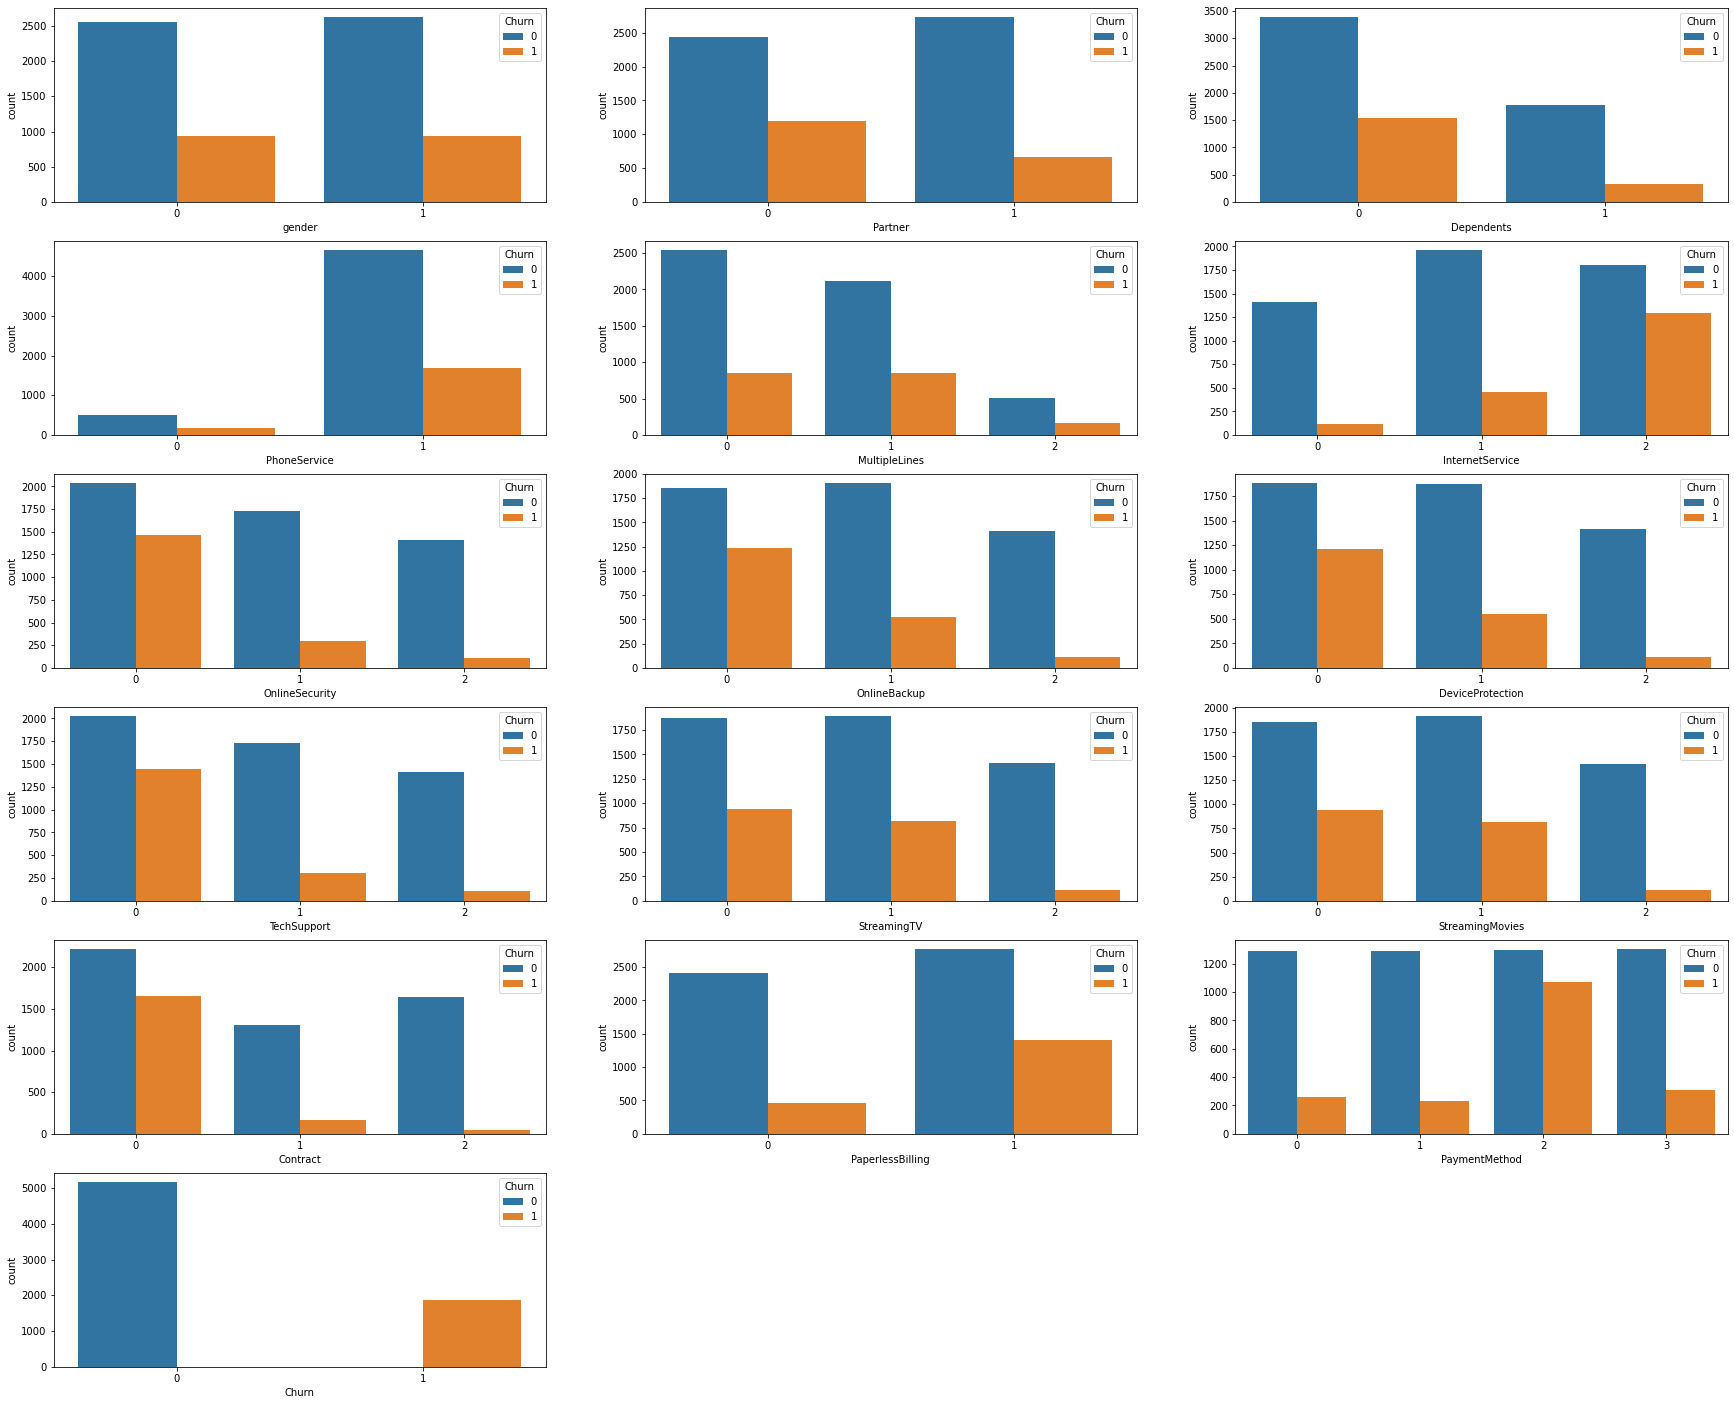

In [25]:
i = 1
plt.figure(figsize = (30,25))
for feature in categorical_features:
    plt.subplot(6,3,i)
    sns.countplot(x = feature,hue = 'Churn' , data = df_merged)
    i +=1

- ### From the plot we can observe that:
    - People with no partners have a higher chance to churn
    - People with no dependents have a higher chance to churn
    - People with phone service have a higher probability to churn
    - People with Fiber Optic as their Internet service have higher chances to churn
    - People with no Online Security have a higher chance to churn
    - People with no Online Backup have a higher probability to churn
    - People with no Device Protection have a higher chance to churn
    - People with no Technology support have a higher probability to churn
    - People with no Streaming TV have a higher probability to churn
    - People with no Streaming Movies have a higher probability to churn
    - People with Month to month contract have a higher chance to churn
    - People with Paperless billing have a higher probability to churn
    - People who pay using Electronic check have a higher chance to churn

### Univariate analysis of the target variable "Churn" using pie chart

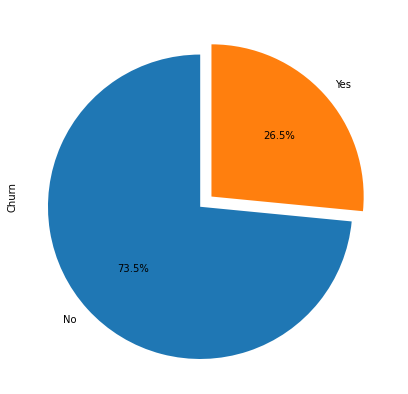

In [26]:
# Analyze the distribution of the target variable "Churn"
df_merged['Churn'].value_counts().plot(kind='pie', labels=['No','Yes'], autopct='%1.1f%%',explode=[0.1,0],figsize=(20,7),startangle=90)
plt.show()


- We have 73.5% records as customers who have not churned and 26.5% customers who have churned.

### Data Visualization

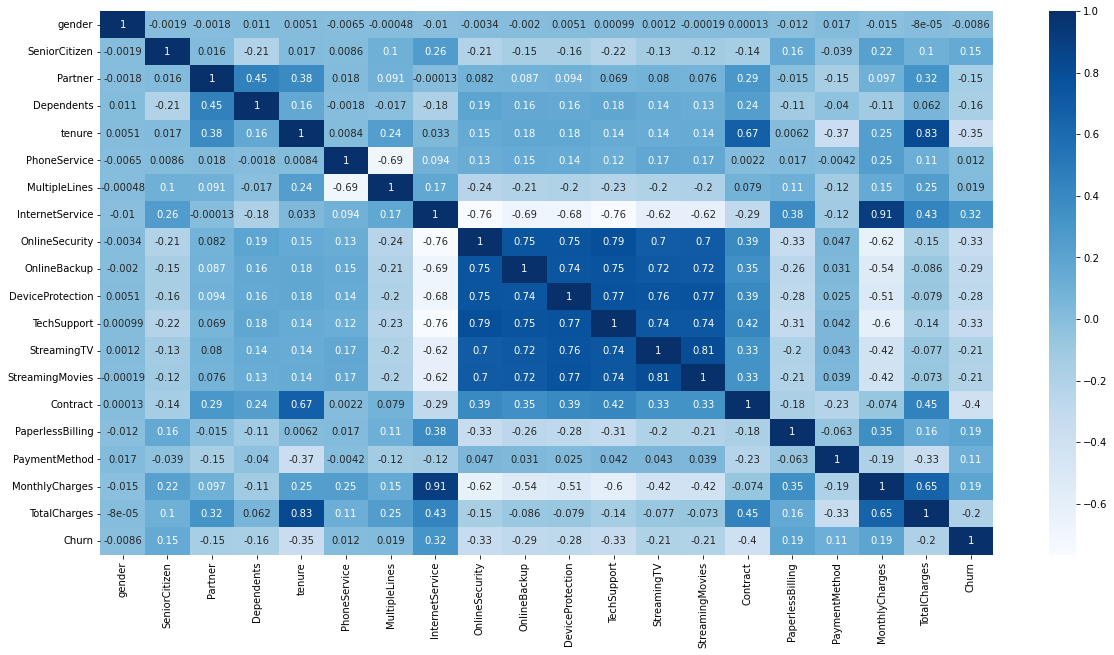

In [27]:
## lets visualize the correlation using heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(df_merged.corr(), annot=True, cmap='Blues')
plt.show()

- Higher correlation between Internet Services and Monthly charges
- Higher correlation between Tenure and Total charges

### Bivariate analysis of Tenure and TotalCharges using scatterplot

<AxesSubplot:xlabel='tenure', ylabel='TotalCharges'>

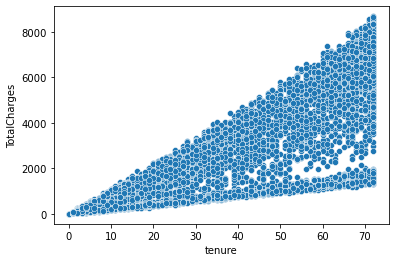

In [28]:
sns.scatterplot(df_merged["tenure"], df_merged["TotalCharges"])

- Higher the duration of the customer with the telecom service, higher is the total charges paid by the customer

### Bivariate analysis of Internet Service and Monthly Charges using lineplot

<AxesSubplot:xlabel='InternetService', ylabel='MonthlyCharges'>

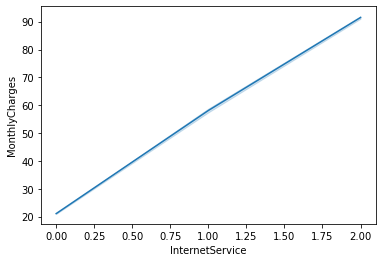

In [29]:
sns.lineplot(df_merged["InternetService"], df_merged["MonthlyCharges"])

#### Labels to refer to the graph above: 
##### Internet Service - No(0), DSL(1) , Fiber Optic(2)
- People with Fiber Optic as their internet service pay the highest monthly charges

### Multivariate analysis of InternetService,StreamingMovies and StreamingTV based on gender using barplot

<AxesSubplot:xlabel='InternetService', ylabel='StreamingMovies'>

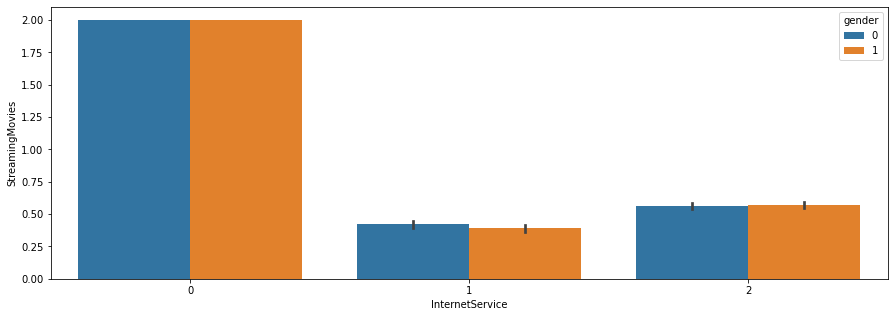

In [30]:
# figure size in inches
plt.figure(figsize=(15,5))

sns.barplot(df_merged['InternetService'], df_merged['StreamingMovies'], hue = df_merged["gender"])

#### Labels to refer to the graph above: 
##### Internet Service - No(0), DSL(1) , Fiber Optic(2)
##### Streaming Movies - No(0), Yes(1), No internet(2)
##### Gender - Female(0), Male(1)
- People of both the genders with no internet do not stream any movie 
- Male with Fiber optic internet service are more likely to stream movies as compared to females
- Female with DSL internet service are more likely to stream movies as compared to males

# 3. Data Preparation for model building:

### Store the target column (i.e. Churn) in the y variable and the rest of the columns in the X variable.

In [31]:
# separate independent variables in the X variable
X = df_merged.drop('Churn',axis=1)
# separate target column (i.e. Churn) in the Y variable
Y = df_merged['Churn']

### Split the dataset into two parts (i.e. 70% train and 30% test).

In [32]:
## Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.30)

### Standardize the columns using z-score scaling approach.

In [33]:
## Scaling the data using standard scalar
ss = StandardScaler()

X_train.iloc[:,:] = ss.fit_transform(X_train.iloc[:,:])
X_test.iloc[:,:] = ss.transform(X_test.iloc[:,:])

print(X_train.shape,X_test.shape)
print(Y_train.shape,Y_test.shape)

(4930, 19) (2113, 19)
(4930,) (2113,)


# 4. Model training, and testing:

### Train and test Logistic regression, KNN, and Naive Bayes models

- ### Logistic Regression Model

In [34]:
# Create an instance
log_reg = LogisticRegression()
#Learning
log_reg.fit(X_train,Y_train)

LogisticRegression()

In [35]:
# Check for prediction results
y_pred = log_reg.predict(X_test)

In [36]:
# Print the intercept of the model
print('Intercept of the logistic model fitted is: ',log_reg.intercept_)

Intercept of the logistic model fitted is:  [-1.71617972]


In [37]:
# Below code to show the column name along with the coefficient of the logistic model

X = df_merged.drop('Churn',axis=1)
# Create lists
column_labels = X.columns.tolist()
coef = log_reg.coef_.squeeze().tolist()

# Zip together
labels_coef = list(zip(column_labels, coef))

# Verify the result
pprint(labels_coef)


[('gender', -0.02972061879057396),
 ('SeniorCitizen', 0.057938597218296854),
 ('Partner', -0.018336815968881752),
 ('Dependents', -0.0769068431074116),
 ('tenure', -1.3835028759093968),
 ('PhoneService', 0.10140648230164126),
 ('MultipleLines', 0.23704091057652843),
 ('InternetService', 0.8470453014938549),
 ('OnlineSecurity', -0.24832342854549902),
 ('OnlineBackup', -0.06519784670002199),
 ('DeviceProtection', -0.01586187146220438),
 ('TechSupport', -0.2546034195252599),
 ('StreamingTV', 0.24401974267100038),
 ('StreamingMovies', 0.3316488331740649),
 ('Contract', -0.5608885969807983),
 ('PaperlessBilling', 0.16746795852266264),
 ('PaymentMethod', 0.096933546679719),
 ('MonthlyCharges', -0.29657982983741843),
 ('TotalCharges', 0.5615031744499086)]


From the above set of coefficents we see that Senior Citizen, PhoneService, MultipleLines, InternetService, StreamingTV, StreamingMovies, PaperlessBilling, PaymentMethod and TotalCharges are the features which help in predicting whether or not the person can churn or not.

In [38]:
# Check for accuray of the model
accuracy_score(Y_test,y_pred)

0.8069096071935636

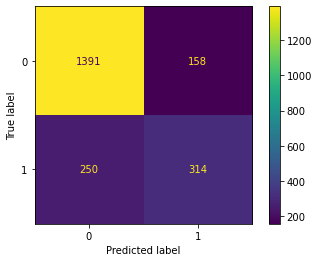

In [39]:
## Confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(log_reg, X_test, Y_test)  
plt.show()

- Although it is working much better for class 0 but for class 1 it is unable to predict accurately.

In [40]:
## Compute precision, recall and F1-score
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1549
           1       0.67      0.56      0.61       564

    accuracy                           0.81      2113
   macro avg       0.76      0.73      0.74      2113
weighted avg       0.80      0.81      0.80      2113



- We see that accuracy is 0.81, but recall for class-1 is quite low due to class imbalance

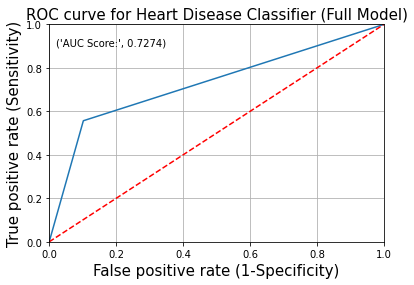

In [41]:
# the roc_curve() returns the values for false positive rate, true positive rate and threshold
# pass the actual target values and predicted probabilities to the function
from sklearn.metrics import roc_curve
from sklearn import metrics
fpr, tpr, thresholds = roc_curve(Y_test, y_pred)

# plot the ROC curve
plt.plot(fpr, tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('ROC curve for Heart Disease Classifier (Full Model)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

# add the AUC score to the plot
# 'x' and 'y' gives position of the text
# 's' is the text 
# use round() to round-off the AUC score upto 4 digits
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(Y_test, y_pred),4)))
                               
# plot the grid
plt.grid(True)

- An AUC score of 0.73 signifies that the model is fair but not good or excellent.

- ### KNN Classification Model

In [42]:
## Fit the KNN classifier model to the train dataset
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [43]:
## compute y predicted labels
y_pred_knn = knn.predict(X_test)
y_pred_knn[:10]

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0])

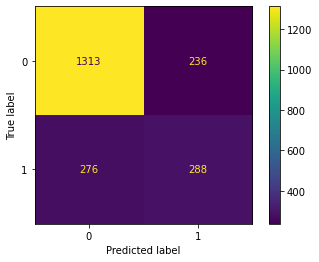

In [44]:
## Confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn, X_test, Y_test)  
plt.show()

In [45]:
## Compute precision, recall and F1-score
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1549
           1       0.55      0.51      0.53       564

    accuracy                           0.76      2113
   macro avg       0.69      0.68      0.68      2113
weighted avg       0.75      0.76      0.75      2113



In [46]:
## accuracy
print('accuracy:',accuracy_score(Y_test,y_pred_knn))

accuracy: 0.7576904874585897


- The accuracy of the KNN model is 0.76 with a default value of k=5. Hence now will find the optimal value of k which gives minimal error rate.

In [47]:
error_rate = []

for i in range(1,15):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,Y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != Y_test))

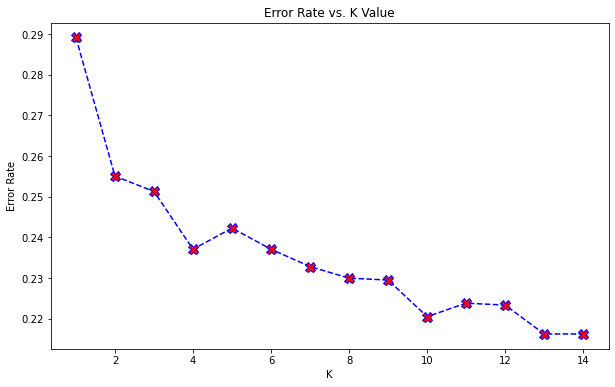

In [48]:
plt.figure(figsize=(10,6))
plt.plot(range(1,15),error_rate,color='blue', linestyle='dashed', marker='X',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

- From the above plot, we can observe that the error is lowest for 14 neigbours, lets build KNN classifier using this K value and compare the accuracy

In [49]:
## KNN classfier with optimal K=14
knn_fourteen = KNeighborsClassifier(n_neighbors=14)
knn_fourteen.fit(X_train,Y_train)

## y predicted
y_pred_knn_fourteen = knn_fourteen.predict(X_test)

## accuracy
print('accuracy (k=14):',accuracy_score(Y_test,y_pred_knn_fourteen))

accuracy (k=14): 0.783719829626124


In [50]:
### Comparison of the two KNN classification models
print('accuracy (default K):',accuracy_score(Y_test,y_pred_knn))
print('accuracy (k=14)      :',accuracy_score(Y_test,y_pred_knn_fourteen))

accuracy (default K): 0.7576904874585897
accuracy (k=14)      : 0.783719829626124


- After selecting an optimal value of k=14, KNN gave a better result with a 2% increase in accuracy 

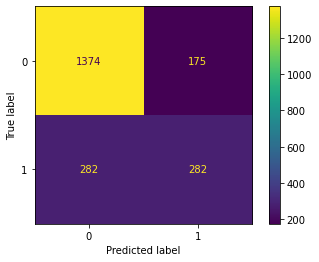

In [51]:
## Confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn_fourteen, X_test, Y_test)  
plt.show()

In [52]:
## Compute precision, recall and F1-score
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred_knn_fourteen))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1549
           1       0.62      0.50      0.55       564

    accuracy                           0.78      2113
   macro avg       0.72      0.69      0.70      2113
weighted avg       0.77      0.78      0.78      2113



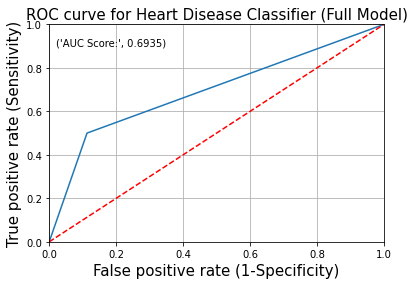

In [53]:
# the roc_curve() returns the values for false positive rate, true positive rate and threshold
# pass the actual target values and predicted probabilities to the function
from sklearn.metrics import roc_curve
from sklearn import metrics
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_knn_fourteen)

# plot the ROC curve
plt.plot(fpr, tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('ROC curve for Heart Disease Classifier (Full Model)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

# add the AUC score to the plot
# 'x' and 'y' gives position of the text
# 's' is the text 
# use round() to round-off the AUC score upto 4 digits
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(Y_test, y_pred_knn_fourteen),4)))
                               
# plot the grid
plt.grid(True)

- With neighbour as 14 the recall has improved but the AUC score of 0.69 indicates that the model is not good

- ### Naive Bayes Classification Model

In [54]:
# Now we’ll import and instantiate the Gaussian Naive Bayes module from SKlearn GaussianNB. 
# To fit the model, we pass x_train and y_train.
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, Y_train)

GaussianNB()

In [55]:
## compute y predicted labels
y_pred_gnb = gnb.predict(X_test)
y_pred_gnb[:10]

array([0, 0, 1, 0, 1, 1, 0, 0, 1, 0])

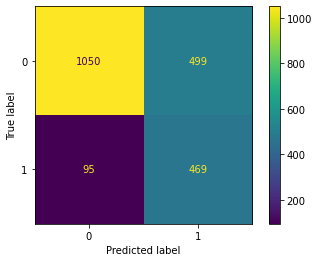

In [56]:
## Confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(gnb, X_test, Y_test)  
plt.show()

In [57]:
## Compute precision, recall and F1-score
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred_gnb))

              precision    recall  f1-score   support

           0       0.92      0.68      0.78      1549
           1       0.48      0.83      0.61       564

    accuracy                           0.72      2113
   macro avg       0.70      0.75      0.70      2113
weighted avg       0.80      0.72      0.73      2113



In [58]:
## accuracy
print('accuracy:',accuracy_score(Y_test,y_pred_gnb))

accuracy: 0.7188831045906294


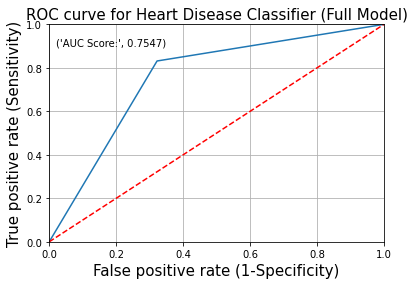

In [59]:
# the roc_curve() returns the values for false positive rate, true positive rate and threshold
# pass the actual target values and predicted probabilities to the function
from sklearn.metrics import roc_curve
from sklearn import metrics
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_gnb)

# plot the ROC curve
plt.plot(fpr, tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('ROC curve for Heart Disease Classifier (Full Model)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

# add the AUC score to the plot
# 'x' and 'y' gives position of the text
# 's' is the text 
# use round() to round-off the AUC score upto 4 digits
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(Y_test, y_pred_gnb),4)))
                               
# plot the grid
plt.grid(True)

- An AUC score of 0.75 indicates that the model is fair but not good or excellent.

## Comparison of Logistic Regression,KNN Classifier and Naive Bayes models

In [60]:
### Comparison of Logistic Regression,KNN classfier model and Naive bayes classifier model 
print('Logistic Regression model - accuracy:',accuracy_score(Y_test,y_pred))
print('KNN with optimal K - accuracy:',accuracy_score(Y_test,y_pred_knn_fourteen))
print('Naive Bayes model - accuracy:',accuracy_score(Y_test,y_pred_gnb))

Logistic Regression model - accuracy: 0.8069096071935636
KNN with optimal K - accuracy: 0.783719829626124
Naive Bayes model - accuracy: 0.7188831045906294


- Out of these three models, Logistic Regression is giving the best results with an accuracy of 0.81

# 5. Conclusion and improvisation:

- Since the Logistic Regression model is giving a better accuracy as compared to Naive Bayes and KNN Classifiers, hence there are few more inferences which can be derived from this final model:

     - Senior Citizen, PhoneService, MultipleLines, InternetService, StreamingTV, StreamingMovies, PaperlessBilling, PaymentMethod and TotalCharges are the features which help in predicting whether or not the person can churn or not.
     - We see that accuracy for Logistic Regression is 0.81, but recall for class-1 is quite low due to class imbalance
     - An AUC score of 0.73 signifies that the model is fair but not good or excellent.
     - As compared to the other two models the Logistic Regression model can predict better pinpoints and patterns of customer churn so that the company can increase the focus on strategizing customer retention.